# Hyperparameters and model validation

In this notebook, we will explore what hyperparameters are and implement a technique known as grid search in order to find the optimal hyperparameters for our model.

# What is a hyperparameter?

A hyperparameter is a variable or argument whose value is set before the training process begins. In contrast, _parameters_ are those values derived via training. Different model training algorithms require different hyperparameters, and some simple algorithms require none. 

[**Hyperparameter optimisation**](https://en.wikipedia.org/wiki/Hyperparameter_optimization), or tuning, is the method of choosing a set of optimal hyperparameters for a learning algorithm.

The same type of machine learning model can require different constraints, weights or learning rates to generalise to different data patterns. Hyperparameter optimisation finds a tuple of hyperparameters that yields an optimal model which minimises a predefined loss function on given data. 

Various techniques exist for tuning hyperparameters, to name a few:

* Grid search;
* Random search;
* Bayesian optimisation;
* Gradient-based optimisation; and
* Evolutionary optimisation.

In this tutorial we will be implementing Grid Search and leave the exploration of other techniques as an exercise for the reader.

### Imports

Let us start off as usual, by importing all the necessary packages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

We'll be using the MBTI dataset from previous trains. However, we will skip the pre-processing stage here and load in our bag of words directly to make things easier.

In [2]:
mbti = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/classification_sprint/mbti_count_vector_downsampled.csv')

In [3]:
mbti.head()

,actually,agree,ask,away,bad,believe,best,better,bit,care,...,work,world,wouldnt,wrong,yeah,year,years,yes,youre,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Now we'll allocate features and labels and split our data into training and testing sets. This dataset is rather large. Let's only use 5,000 entries so that we can speed up our training time.

In [4]:
X = mbti.drop('y', axis=1)
y = mbti['y']

n = 5000
X_n = X[:n]
y_n = y[:n]
X_train, X_test, y_train, y_test = train_test_split(X_n, y_n)

In [6]:
X_test

,actually,agree,ask,away,bad,believe,best,better,bit,care,...,welcome,work,world,wouldnt,wrong,yeah,year,years,yes,youre
1838,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
661,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3036,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
387,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
355,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
605,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1800,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2028,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## K-Nearest Neigbours

Let's start with the K-Nearest Neighbours algorithm as it has one of the more simple hyperparameters: 
* `K` - the number of nearest neighbours to use in the classifier

In this example, we'll create 13 different KNN models, each with a different number of neighbours. We'll generate the results of both the training and testing accuracy in order to analyse the performance of each of these models. Note that this cell might take more time to complete than you are used to, as we are now training 13 models instead of 1.

**Note: The code below takes 1-2 minutes to execute.**

In [7]:
from sklearn.neighbors import KNeighborsClassifier
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100]

results = []

for k in ks:
    print('Fitting KNN model with k = {:d}'.format(k))
    knn = KNeighborsClassifier(k)
    run_time = %timeit -q -o knn.fit(X_train, y_train)
    
    # predicting
    y_pred = knn.predict(X_train)   
    y_pred_test = knn.predict(X_test)
    
    # scoring
    accuracy  = metrics.accuracy_score(y_train, y_pred)
    precision = metrics.precision_score(y_train, y_pred)
    recall    = metrics.recall_score(y_train, y_pred)    
    f1        = metrics.f1_score(y_train, y_pred)    
    f1_test   = metrics.f1_score(y_test, y_pred_test)    
    
    # save the results 
    results.append([k, accuracy, precision, recall, f1, f1_test, run_time.best])
    
results = pd.DataFrame(results, columns=['KNN', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test', 'Train Time'])
results.set_index('KNN', inplace= True)

Fitting KNN model with k = 1
Fitting KNN model with k = 2
Fitting KNN model with k = 3
Fitting KNN model with k = 4
Fitting KNN model with k = 5
Fitting KNN model with k = 6
Fitting KNN model with k = 7
Fitting KNN model with k = 8
Fitting KNN model with k = 9
Fitting KNN model with k = 10
Fitting KNN model with k = 20
Fitting KNN model with k = 50
Fitting KNN model with k = 100


Let's print off the training classification report, as well as the F1-score of predicting on the test set, so that we can analyse the models' performance.

In [8]:
results

,Accuracy,Precision,Recall,F1 Train,F1 Test,Train Time
KNN,,,,,,
1,0.924267,0.950694,0.950694,0.950694,0.789581,0.005717
2,0.757600,0.984752,0.695139,0.814981,0.644578,0.005660
3,0.822667,0.829711,0.967708,0.893412,0.837410,0.005582
4,0.785333,0.846180,0.880556,0.863025,0.789233,0.005686
5,0.792000,0.803819,0.964583,0.876894,0.852166,0.005625
6,0.782933,0.817846,0.922917,0.867210,0.828460,0.005621
7,0.783467,0.790449,0.977083,0.873913,0.863867,0.005689
8,0.775733,0.794738,0.954514,0.867329,0.850964,0.005711
9,0.776000,0.781302,0.983681,0.870888,0.874257,0.005655


These numbers are rather hard to read. Let's print out a graph of the F1 scores and see the comparison of the training and testing scores.

<Axes: xlabel='KNN'>

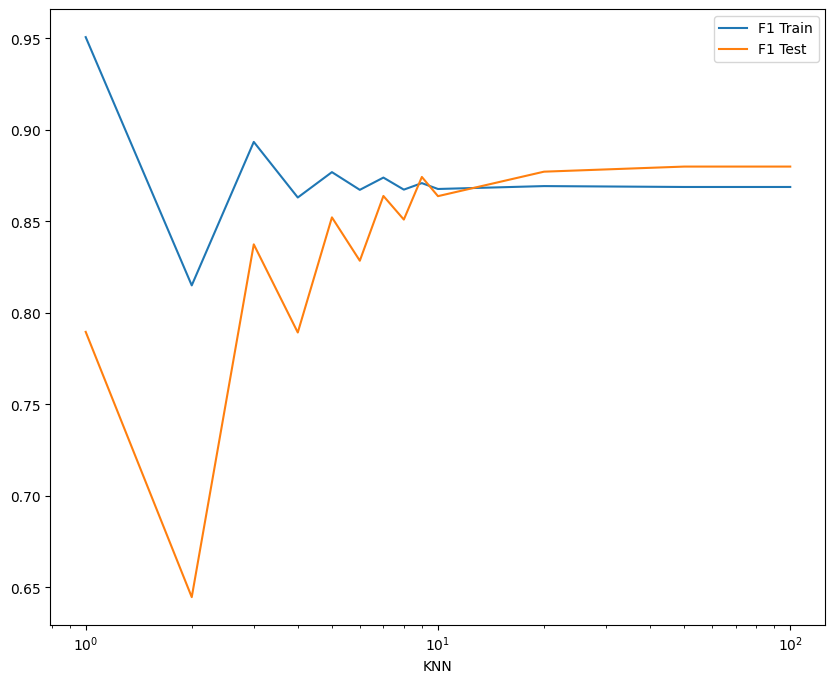

In [9]:
results[['F1 Train', 'F1 Test']].plot(kind = 'line', figsize=(10, 8), logx=True)

We have set `logx=True`, which creates a logarithmic scale along the x-axis to easier show values over a greater range. We can see that until approximately `K=10`, the F1-score tends to jump around a bit. With `K` < 7 there is still a large difference between the performance on the training and testing sets. At around `K` = 9 these values seem to start to converge, suggesting we are nearing an optimal value for the hyperparameter.

### `sklearn` GridSearch

Hyperparameter tuning can be automated using `sklearn`'s parameter search strategies. As in the example above where we exhaustively consider all parameter combinations (or at least most of the parameters between `K` = 1 and 100), this can be done using the search strategy `GridSearchCV`. Let's see how that works.

#### Imports

We'll need to import `GridSearchCV`.

In [10]:
from sklearn.model_selection import GridSearchCV

In this example we will iterate over the same `K` values as we did above. This is done by assigning the number of neighbours to the above list of `K` values inside a grid of parameters - if you wanted to tune more of the model's parameters, these values would be added to this parameter grid.

The grid is in the form of a dictionary, so we would add them in the format of:

`'<hyperparam_1>': <set of values>,`

`'<hyperparam_2>': <set of values>,`

`...etc...`

In [11]:
# ks is the list of k-values we created above
param_grid = {'n_neighbors': ks}

Next, we create an instance of `GridSearchCV` where we indicate the model type (KNN) and the scoring metric to measure model performance on (in this case F1-score). You can also change the number of folds in the cross-validation splitting strategy, but by default this is set to five, and we'll leave it as is.

In [12]:
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, scoring='f1')

Now we can simply fit this GridSearch model to the training data, and determine what the optimal value for our number of neighbours is by printing out the best parameter values.

In [13]:
grid_knn.fit(X_n, y_n)
grid_knn.best_params_

{'n_neighbors': 50}

# Support vector machine

Models generally have more than one hyperparameter to tune.  `sklearn` provides automated tools to do this in the grid search module. we'll now work through an example of using grid search to find the optimal hyperparameters for a Support Vector Machine.

The grid search algorithm will fit a model for all of the combinations of hyperparameters you specify. It will also apply K-fold cross-validation. The hyperparameters that optimise for a given scoring metric will then be returned.

Let's start by importing `sklearn`'s Support Vector Classifier.

In [14]:
from sklearn.svm import SVC

There are a lot of parameters in SVC to play around with!  We will be focussing on the following:

* `C`: The penalty parameter of the error term; and
* `gamma`: The kernel coefficient.

In this example, we'll set the number of folds in our cross validation to 2, we'll optimise using F1-score, and tune the two above mentioned parameters. `sklearn` really does make this simple for us.

In [15]:
nfolds = 2

Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]

param_grid = {
    'C'     : Cs, 
    'gamma' : gammas
    }

grid_SVM = GridSearchCV(SVC(), param_grid, scoring='f1', cv=nfolds)
grid_SVM.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.001, 0.01, 0.1, 1]},
             scoring='f1')

All done! Can you calculate how many models we just trained?

Finally, we'll print out the best parameters for `C` and `gamma`.

In [16]:
grid_SVM.best_params_

{'C': 1, 'gamma': 0.1}

## References

This notebook is based in large part on the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).